데이터 로딩

In [3]:
import pandas as pd
import numpy as np

#sklearn 데이터셋에서 iris 데이터셋 로딩 - 붓꽃 데이터 불러옴
from sklearn import datasets
iris = datasets.load_iris()

#dictionary 형태임
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(iris['DESCR'])
#150개 samples
#4개 attribute information (설명 변수 = feature)
#3개 class (분류 대상이 되는 목표 레이블)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

target 속성

In [5]:
print("데이터셋 크기:", iris['target'].shape)
print("데이터셋 내용\n", iris['target'])
#각각 50개씩 클래스 0,1,2로 1차원으로 구성이 되어있네

데이터셋 크기: (150,)
데이터셋 내용
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


data 속성

In [6]:
print("데이터셋 크기:", iris['data'].shape)

데이터셋 크기: (150, 4)


In [7]:
#아 150행 4열(feature)인 2차원 배열이네
#첫 7개 행만 출력을 하여 내용을 확인해보자
print("데이터셋 내용:\n", iris['data'][:7,:]) #(행, 열)

데이터셋 내용:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]]


데이터프레임 변환

In [8]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
#columns 이름을 간결하게 바꾸자
df.columns = ['sepal_length','sepal_width','petal_length','petal_width']
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [10]:
#iris데이터셋의 target속성에 있는데 이 데이터를 df에 새 열로 추가하자
df['target'] = iris['target']
print(df.shape)
df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


데이터 탐색

In [11]:
df.info()
#데이터 기본 정보를 보여줌
#150개의 유효 데이터가 있네(non-null)
#64bit 실수형 float64과 정수형(int64)로 구성

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [12]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
#결측값 확인
df.isnull() #false 면 정상

,sepal_length,sepal_width,petal_length,petal_width,target
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [14]:
df.isnull().sum() #좀 더 보기 쉬움

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [15]:
#중복 데이터 확인
df.duplicated().sum()
#1개의 행이 그 전에 있는 행과 중복된 상태라는 뜻

1

In [16]:
#어느 행의 샘플 데이터가 중복인지 확인을 해보자
df.loc[df.duplicated(),:]

,sepal_length,sepal_width,petal_length,petal_width,target
142,5.8,2.7,5.1,1.9,2


In [17]:
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [18]:
#중복되는거 전부 나타내보자
df.loc[ (df.sepal_length==5.8) & (df.petal_width ==1.9), :]

,sepal_length,sepal_width,petal_length,petal_width,target
101,5.8,2.7,5.1,1.9,2
142,5.8,2.7,5.1,1.9,2


In [19]:
#중복 제거
df = df.drop_duplicates()
df.loc[ (df.sepal_length==5.8) & (df.petal_width ==1.9), :] #제거 완료

,sepal_length,sepal_width,petal_length,petal_width,target
101,5.8,2.7,5.1,1.9,2


In [20]:
df.corr() #변수 간의 상관 관계 분석

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.118129,0.873738,0.820620,0.786971
sepal_width,-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal_length,0.873738,-0.426028,1.000000,0.962772,0.949402
petal_width,0.820620,-0.362894,0.962772,1.000000,0.956514
target,0.786971,-0.422987,0.949402,0.956514,1.000000


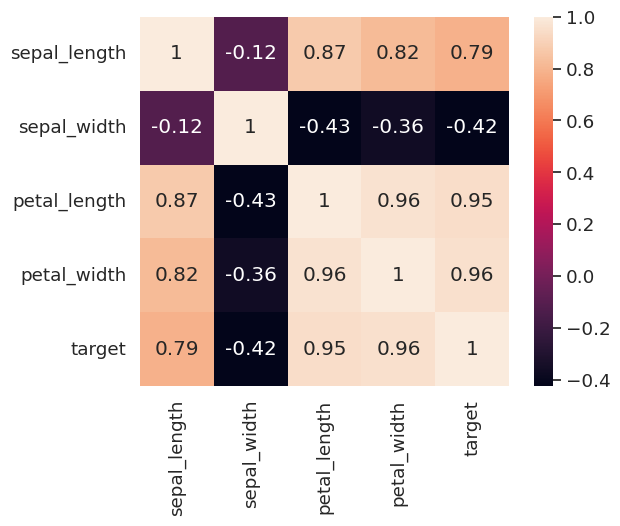

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

#상관 계수 히트맵
sns.heatmap(data=df.corr(), square=True, annot=True, cbar=True)
plt.show()

In [22]:
#종류별 샘플 개수를 출력해보자
df['target'].value_counts()

0    50
1    50
2    49
Name: target, dtype: int64

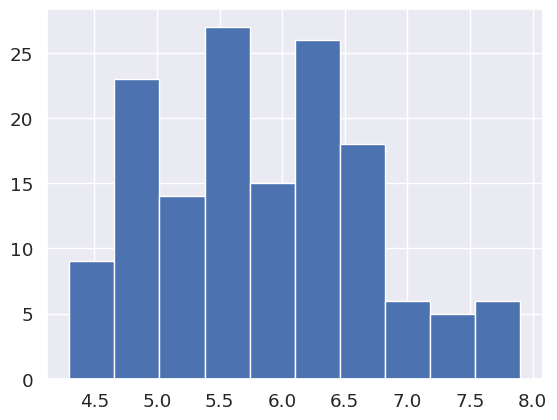

In [23]:
#sepal_length열의 데이터를 히스토그램으로 나타내보자
plt.hist(x='sepal_length',data=df)
plt.show()

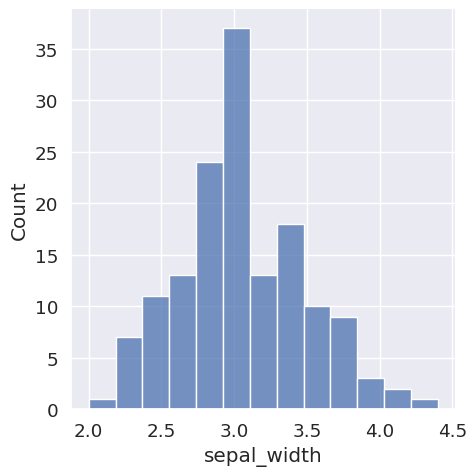

In [24]:
sns.displot(x='sepal_width',kind='hist',data=df)
plt.show()

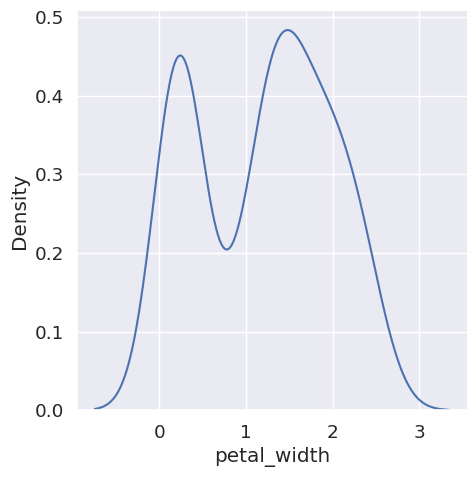

In [25]:
#KDE 밀도함수 그래프를 그려보자
sns.displot(x='petal_width',kind='kde',data=df)
plt.show()

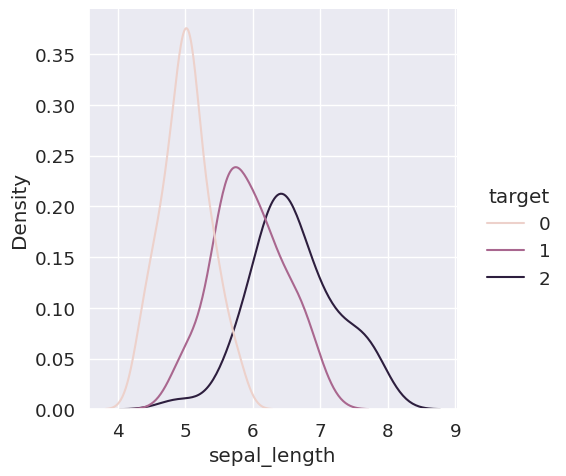

In [26]:
sns.displot(x='sepal_length',hue='target',kind='kde',data=df)
plt.show()

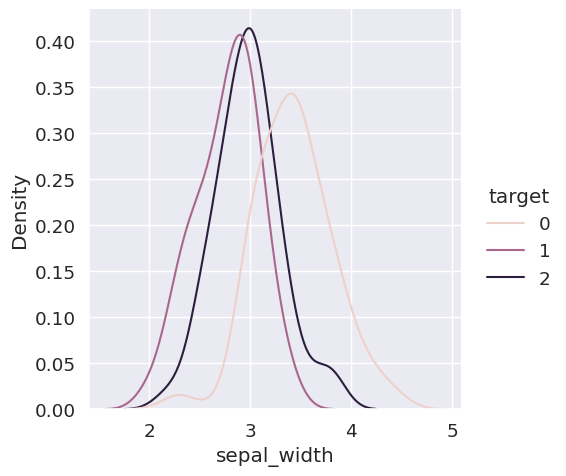

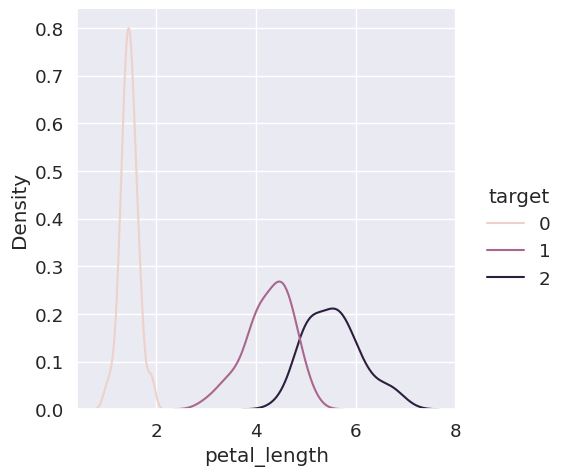

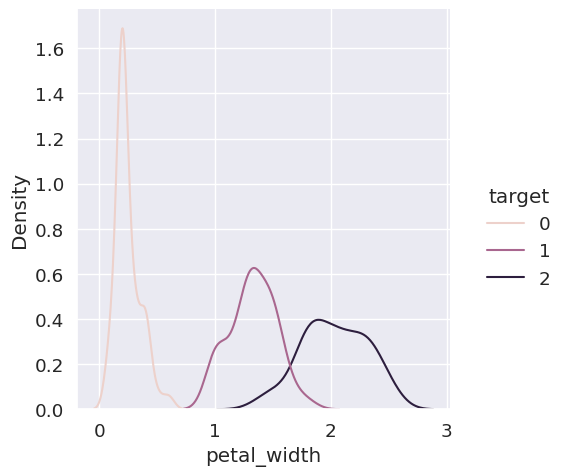

In [27]:
#다른 피처들도 한번에 그래프로 출력
for col in ['sepal_width','petal_length','petal_width']:
  sns.displot(x=col,hue='target',kind='kde',data=df)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


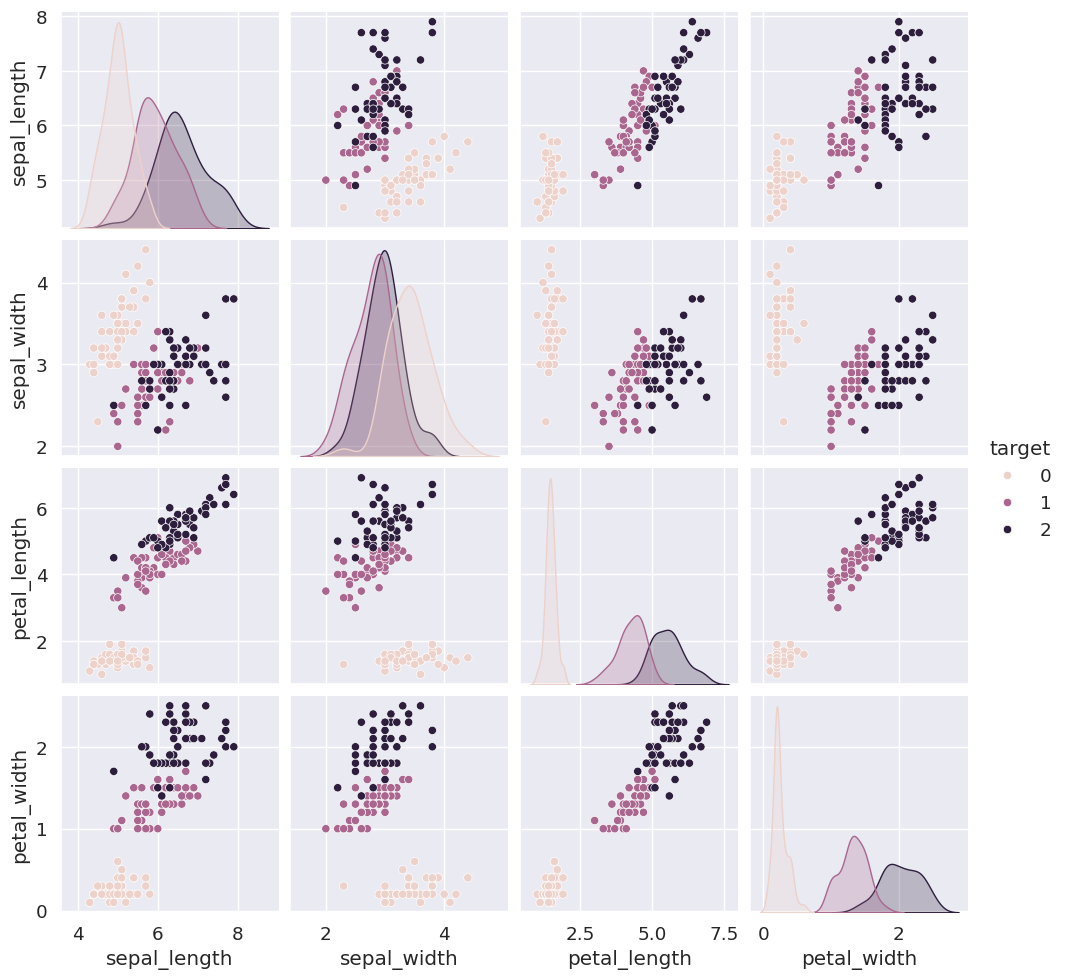

In [28]:
sns.pairplot(df, hue='target',size=2.5, diag_kind='kde')
plt.show()

Train-Test 데이터셋 분할

In [29]:
#모델 학습에 사용할 훈련 데이터와 모델 성능을 평가하는데 사용할 테스트 데이터 분할

from sklearn.model_selection import train_test_split  #train_test_split: 편리하게 나눌 수 있다.

#모델 학습에 사용할 피처로 4개 열 선택: 입력 데이터(X_data)에 할당
#목표 레이블(y_data)에 Target열을 지정

X_data = df.loc[:,'sepal_length':'petal_width']
y_data = df.loc[:,'target']

#test_size=0.2 : 20% 테스트용, 80% 훈련용
#150개 중 하나는 중복 데이터였으니 총 149개 데이터 중 -> 30테스트, 119훈련
#random_state 옵션은 무작위 추출 할 때 항상 일정한 기준으로 분할하기에, 다시 실행해도 같은 결과임.
#random_state 뒤의 숫자는 그냥 몇번 부터 어떤 순서로 섞을 까요?임.
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size= 0.2, shuffle= True, random_state=20)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(119, 4) (119,)
(30, 4) (30,)


분류 알고리즘1 - KNN(K-Nearest-Neighbors)

예측하려는 데이터 X가 주어지면, 기존 데이터 중 속성이 비슷한 K개의 이웃을 먼저 찾는다. 데이터 X를 둘러싼 K개의 가장 가까운 이웃을 찾고, 이웃 데이터가 가장 많이 속해 있는 목표 클래스를 예측값으로 결정

K 값에 따라 모델의 예측력이 달라지므로 적정한 K 값을 설정해야함..

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7) #하이퍼파라미터의 값을 바꿔가면서 모델 성능을 개선
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [31]:
y_knn_pred = knn.predict(X_test)
print("예측값:", y_knn_pred)

예측값: [0 1 1 2 1 1 2 0 2 0 2 1 2 0 0 2 0 1 2 1 1 2 2 0 2 1 1 0 2 2]


In [32]:
#성능 평가
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_test,y_knn_pred)
print("Accuracy: %.4f"%knn_acc)



Accuracy: 0.9667


분류 알고리즘2 - SVM(Support Vector Machine)

In [33]:
#군집까지의 거리(margin)를 최대한 멀리 유지하는 경계면으로 구분

from sklearn.svm import SVC
svc = SVC(kernel='rbf')  #SVC 인스턴스 객체 생성, rbf = radial basis function
svc.fit(X_train, y_train) #모델 학습

SVC()

In [34]:
#성능 평가
y_svc_pred = svc.predict(X_test)
print("예측값: ", y_svc_pred)
svc_acc = accuracy_score(y_test, y_svc_pred)
print("Accuracy:%.4f"%svc_acc)

예측값:  [0 1 1 2 1 1 2 0 2 0 2 1 2 0 0 2 0 1 2 1 1 2 2 0 1 1 1 0 2 2]
Accuracy:1.0000


분류 알고리즘3 - 로지스틱 회귀

In [35]:
#시그모이드 함수의 출력값을 각 분류 클래스에 속하게 될 확률값으로 사용
#0에 가까우면 아니, 1에가까우면 해당 클래스로 분류

#모델 학습
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()  #객체 생성
lrc.fit(X_train, y_train)

LogisticRegression()

In [37]:
#예측
y_lrc_pred = lrc.predict(X_test)
print("예측값: ", y_lrc_pred)
#성능 평가
lrc_acc = accuracy_score(y_test, y_lrc_pred)
print("Accuracy: %.4f"%lrc_acc)

예측값:  [0 1 1 2 1 1 2 0 2 0 2 1 2 0 0 2 0 1 2 1 1 2 2 0 1 1 1 0 2 2]
Accuracy: 1.0000


In [39]:
#확률값 예측
y_lrc_prob = lrc.predict_proba(X_test)
y_lrc_prob

array([[9.83094463e-01, 1.69054797e-02, 5.76296274e-08],
       [4.60695780e-03, 8.41458183e-01, 1.53934859e-01],
       [1.03674637e-02, 9.20150890e-01, 6.94816466e-02],
       [2.57653602e-05, 5.16404344e-02, 9.48333800e-01],
       [2.39285862e-02, 9.52024104e-01, 2.40473099e-02],
       [2.93669485e-02, 9.25894934e-01, 4.47381177e-02],
       [4.78594708e-06, 1.77678028e-02, 9.82227411e-01],
       [9.80412587e-01, 1.95872996e-02, 1.13561982e-07],
       [1.22341098e-05, 6.66975846e-02, 9.33290181e-01],
       [9.75406679e-01, 2.45932566e-02, 6.41392616e-08],
       [2.73416367e-05, 2.71304908e-02, 9.72842168e-01],
       [1.71528129e-03, 7.49886957e-01, 2.48397761e-01],
       [7.53071860e-04, 4.91861463e-01, 5.07385465e-01],
       [9.84534313e-01, 1.54656590e-02, 2.81278192e-08],
       [9.76953963e-01, 2.30459736e-02, 6.38290274e-08],
       [1.28093656e-03, 2.60492162e-01, 7.38226902e-01],
       [9.91798182e-01, 8.20180668e-03, 1.12005817e-08],
       [4.15672600e-03, 8.61227

분류 알고리즘4 - 의사결정나무

In [45]:
#max_depth가 3인 이유:
#모델이 지나치게 복잡한 구조를 갖게 된다면 훈련 데이터에 과대적합되기 때문이다.


#모델 학습
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 3, random_state = 20)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=20)

In [46]:
#예측
y_dtc_pred = dtc.predict(X_test)
print("예측값: ", y_dtc_pred)

#성능 평가
dtc_acc = accuracy_score(y_test, y_dtc_pred)
print("accuracy: %.4f"% dtc_acc)

예측값:  [0 1 1 2 1 1 2 0 2 0 2 1 1 0 0 2 0 1 2 2 1 2 2 0 1 1 1 0 2 2]
accuracy: 0.9333


앙상블 모델1 - 보팅 Voting

앙상블 모델은 여러 모델들을 결합하여 성능을 높이는 방법

Hard voting: 3개 모델이 예측한 값 중에서 다수결로 최종 분류 클래스를 정함

Soft voting: 3개 모델의 예측한 값들을 평균하여 최종 분류 클래스를 결정

In [48]:
#Hard Voring 모델 학습
from sklearn.ensemble import VotingClassifier
hvc = VotingClassifier(estimators=[('KNN',knn),('SVM',svc),('DT',dtc)], voting='hard')
hvc.fit(X_train, y_train)

#예측
y_hvc_pred = hvc.predict(X_test)
print("예측값:", y_hvc_pred)
hvc_acc = accuracy_score(y_test, y_hvc_pred)
print("Accuracy: %.4f"% hvc_acc)

예측값: [0 1 1 2 1 1 2 0 2 0 2 1 2 0 0 2 0 1 2 1 1 2 2 0 1 1 1 0 2 2]
Accuracy: 1.0000


앙상블 모델2 - 배깅(Bagging)

ex) 랜덤 포레스트

여러 개의 트리 모델을 사용하여 각 모델의 개별 예측값을 보팅을 통해 결정


이 때 각 트리는 전체 학습 데이터 중에서 서로 다른 데이터를 샘플링하여 학습하기에 보팅과 차이가 있다

In [49]:
#50개의 트리 모델
#모델 학습
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 50, max_depth=3, random_state=20)
rfc.fit(X_train,y_train)

#예측
y_rfc_pred = rfc.predict(X_test)
print("예측값", y_rfc_pred)
#검증
rfc_acc = accuracy_score(y_test, y_rfc_pred)
print("accuracy: %.4f"%rfc_acc)

예측값 [0 1 1 2 1 1 2 0 2 0 2 1 1 0 0 2 0 1 2 1 1 2 2 0 1 1 1 0 2 2]
accuracy: 0.9667


앙상블 모델3 - 부스팅(Boosting)

여러 개의 약한 학습기(가벼운 모델)를 순차적으로 학습

잘못 예측한 데이터에 대한 예측 오차를 줄일 수 잇는 방향으로 모델을 계속 업데이트 함

모델을 동시에 학습하는게 아닌 순서대로 학습시키므로 배깅과 다르다

In [64]:
#학습
from xgboost import XGBClassifier
xgbc = XGBClassifier(n_estimators = 50, max_depth=3, random_state=20)
xgbc.fit(X_train,y_train)

#예측
y_xgbc_pred = xgbc.predict(X_test)
print("예측: ", y_xgbc_pred)
#검증
xgbc_acc = accuracy_score(y_test, y_xgbc_pred)
print(xgbc_acc)

예측:  [0 1 1 2 1 1 2 0 2 0 2 1 1 0 0 2 0 1 2 1 1 2 2 0 1 1 0 0 2 2]
0.9333333333333333


교차 검증1 - Hold-out

전체 데이터: 학습데이터 + 테스트 데이터

학습데이터: 훈련 데이터 + 검증 데이터

In [52]:
#검증용 데이터셋 분리  (val stands for validation)
#30(test_size):70 비율로 바꾸겠다
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,
                                            test_size=0.3,
                                            shuffle=True,
                                            random_state=20)
print(X_tr.shape, y_tr.shape)
print(X_val.shape, y_val.shape)

(83, 4) (83,)
(36, 4) (36,)


In [63]:
#학습
rfc = RandomForestClassifier(max_depth=3, random_state=20) #n_estimators가 없으면 default 100
rfc.fit(X_tr, y_tr)

#예측
y_tr_pred = rfc.predict(X_tr)
y_val_pred = rfc.predict(X_val)

#검증
tr_acc = accuracy_score(y_tr, y_tr_pred)  #훈련 데이터    #질문) 훈련 데이터인데 왜 1.0이 안나오는 거임?
val_acc = accuracy_score(y_val, y_val_pred) #검증 데이터
print(tr_acc)
print(val_acc)
#훈련 정확도 > 검증 정확도: 상당히 차이가 나기 때문에 훈련 데이터에 과대적합이 발생 -> 새로운 데이터에 대한 성능이 떨어진다

0.9879518072289156
0.9166666666666666


In [58]:
y_test_pred = rfc.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print("Test Accuracy: %.4f"%test_acc)

Test Accuracy: 0.9000


교차 검증2 - K - fold

홀드아웃 방법을 여러 번 반복하는 방법

시간이 오래 걸리는 단점

In [65]:
#데이터 셋을 5개의 Fold로 분할하는 KFold 객체 생성
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=20)

#훈련용 데이터와 검증용 데이터의 행 인덱스를 각 Fold별로 구분하여 생성
num_fold = 1
for tr_idx, val_idx in kfold.split(X_train):
  print("%s Fold------------------------------------"%num_fold)
  print("훈련:", len(tr_idx), tr_idx[:10])
  print("검증: ",len(val_idx), val_idx[:10])
  num_fold = num_fold + 1

1 Fold------------------------------------
훈련: 95 [ 0  3  4  6  7  8  9 10 11 12]
검증:  24 [ 1  2  5 35 37 39 47 48 51 53]
2 Fold------------------------------------
훈련: 95 [ 1  2  3  4  5  6  7  8  9 10]
검증:  24 [ 0 12 19 21 23 31 36 38 44 46]
3 Fold------------------------------------
훈련: 95 [ 0  1  2  3  5  6  7  9 10 12]
검증:  24 [ 4  8 11 14 24 27 29 30 33 41]
4 Fold------------------------------------
훈련: 95 [ 0  1  2  4  5  6  7  8  9 11]
검증:  24 [ 3 10 13 17 18 25 32 43 57 58]
5 Fold------------------------------------
훈련: 96 [ 0  1  2  3  4  5  8 10 11 12]
검증:  23 [ 6  7  9 15 16 20 22 26 28 34]


In [68]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
95,5.7,3.0,4.2,1.2
88,5.6,3.0,4.1,1.3
0,5.1,3.5,1.4,0.2
46,5.1,3.8,1.6,0.2
11,4.8,3.4,1.6,0.2


In [69]:
#훈련용 데이터와 검증용 데이터의 행 인덱스를 각 Fold별로 구분하여 생성
val_scores = []
num_fold = 1

for tr_idx, val_idx in kfold.split(X_train, y_train):
  #훈련용 데이터와 검증용 데이터를 행 인덱스 기준으로 추출
  X_tr, X_val = X_train.iloc[tr_idx,:], X_train.iloc[val_idx,:]
  y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]

  #학습
  rfc = RandomForestClassifier(max_depth=5, random_state=20)
  rfc.fit(X_tr, y_tr)

  #검증
  y_val_pred = rfc.predict(X_val)
  val_acc = accuracy_score(y_val, y_val_pred)
  print("%d Fold Accuracy:%.4f"%(num_fold, val_acc))
  val_scores.append(val_acc)
  num_fold += 1

1 Fold Accuracy:0.8750
2 Fold Accuracy:1.0000
3 Fold Accuracy:0.9167
4 Fold Accuracy:0.9583
5 Fold Accuracy:0.9565


In [70]:
#평균 Accuracy 계산
import numpy as np
mean_score = np.mean(val_scores)
print(np.round(mean_score,4))

0.9413
